In [1]:
import os
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns

# 結果ファイルのパス
output_dir = os.path.join(os.getcwd(), "results/hyper_params_MC")
if not os.path.exists(output_dir):
    raise FileNotFoundError(f"The specified directory does not exist: {output_dir}")

def load_results(output_dir):
    results = []
    for file_name in os.listdir(output_dir):
        file_path = os.path.join(output_dir, file_name)
        if file_name.endswith(".pkl") and os.path.getsize(file_path) > 0:
            with open(file_path, "rb") as f:
                try:
                    result = pickle.load(f)
                    if isinstance(result, dict):
                        results.append(result)
                except (EOFError, pickle.UnpicklingError):
                    print(f"Warning: Could not load {file_name}, it may be corrupted.")
    return results

# データの読み込み
results = load_results(output_dir)

# データフレームに変換して、視覚化に備える
data = pd.DataFrame([r for r in results if all(key in r for key in ["Spectral Radius", "Units", "RC Connectivity", "Memory Capacity"])])

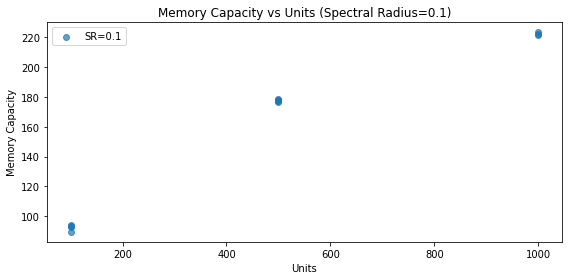

In [2]:
# 可視化1: 各Spectral RadiusごとのUnitsとMemory Capacityの関係を描画
unique_srs = data["Spectral Radius"].unique()
fig, axes = plt.subplots(len(unique_srs), 1, figsize=(8, len(unique_srs) * 4), sharex=True)

# axesが配列でない場合は、リストとして扱えるようにする
if len(unique_srs) == 1:
    axes = [axes]

for i, sr in enumerate(unique_srs):
    sr_data = data[data["Spectral Radius"] == sr]
    axes[i].scatter(sr_data["Units"], sr_data["Memory Capacity"], label=f"SR={sr}", alpha=0.7)
    axes[i].set_title(f"Memory Capacity vs Units (Spectral Radius={sr})")
    axes[i].set_xlabel("Units")
    axes[i].set_ylabel("Memory Capacity")
    axes[i].legend()

plt.tight_layout()
plt.show()


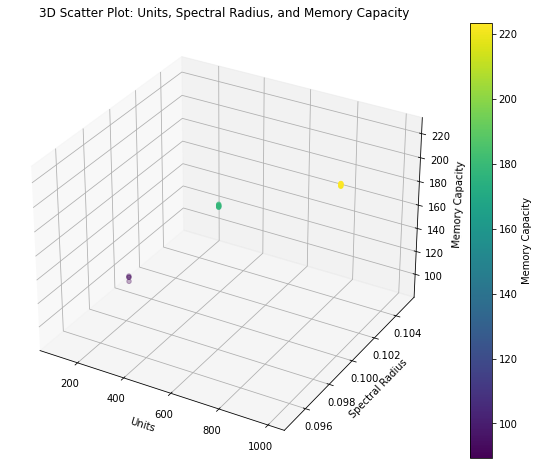

In [3]:
# 可視化2: 3D散布図でUnits, Spectral Radius, Memory Capacityの関係を表示
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data["Units"], data["Spectral Radius"], data["Memory Capacity"], c=data["Memory Capacity"], cmap="viridis")
ax.set_xlabel("Units")
ax.set_ylabel("Spectral Radius")
ax.set_zlabel("Memory Capacity")
ax.set_title("3D Scatter Plot: Units, Spectral Radius, and Memory Capacity")
plt.colorbar(sc, label="Memory Capacity")
plt.show()

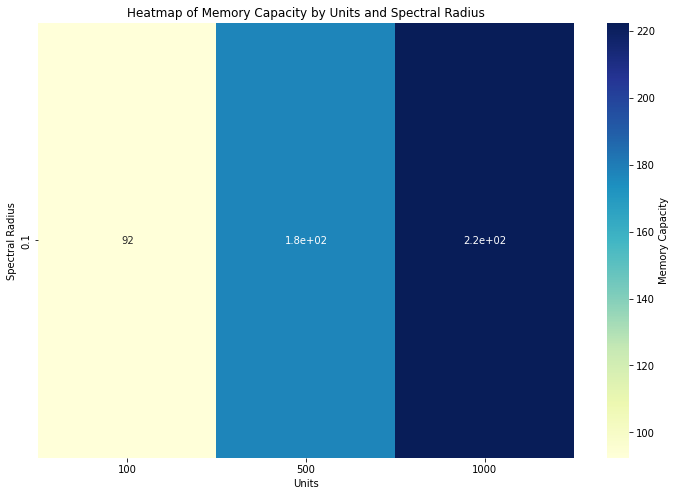

In [4]:
# 可視化3: HeatmapでUnitsとSpectral RadiusによるMemory Capacityを表示
heatmap_data = data.pivot_table(values="Memory Capacity", index="Spectral Radius", columns="Units")
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={"label": "Memory Capacity"})
plt.title("Heatmap of Memory Capacity by Units and Spectral Radius")
plt.xlabel("Units")
plt.ylabel("Spectral Radius")
plt.show()